![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [63]:
# Start your code here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.api import qqplot

df_m = pd.read_csv('men_results.csv', parse_dates=['date'])
print(list(df_m.columns))
df_w = pd.read_csv('women_results.csv', parse_dates=['date'])
print(list(df_w.columns))
df_m_recent = df_m[df_m['date'] > '2002-01-01']
df_w_recent = df_w[df_w['date'] > '2002-01-01']
df_m_recent['is_qualifier'] = df_m_recent['tournament'].str.upper().str.contains('QUALIF')
df_w_recent['is_qualifier'] = df_w_recent['tournament'].str.upper().str.contains('QUALIF')


df_m_match = df_m_recent[(df_m_recent['is_qualifier'] == False) &
                          (df_m_recent['tournament'].str.contains("FIFA World Cup", case=False, na=False))]
df_w_match = df_w_recent[(df_w_recent['is_qualifier'] == False) &
                          (df_w_recent['tournament'].str.contains("FIFA World Cup", case=False, na=False))]
df_m_match['is_men'] = True
df_w_match['is_men'] = False

df = pd.concat([df_m_match, df_w_match])
df['goals'] = df['home_score'] + df['away_score']
print(list(df.columns))


['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']
['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']
['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'is_qualifier', 'is_men', 'goals']


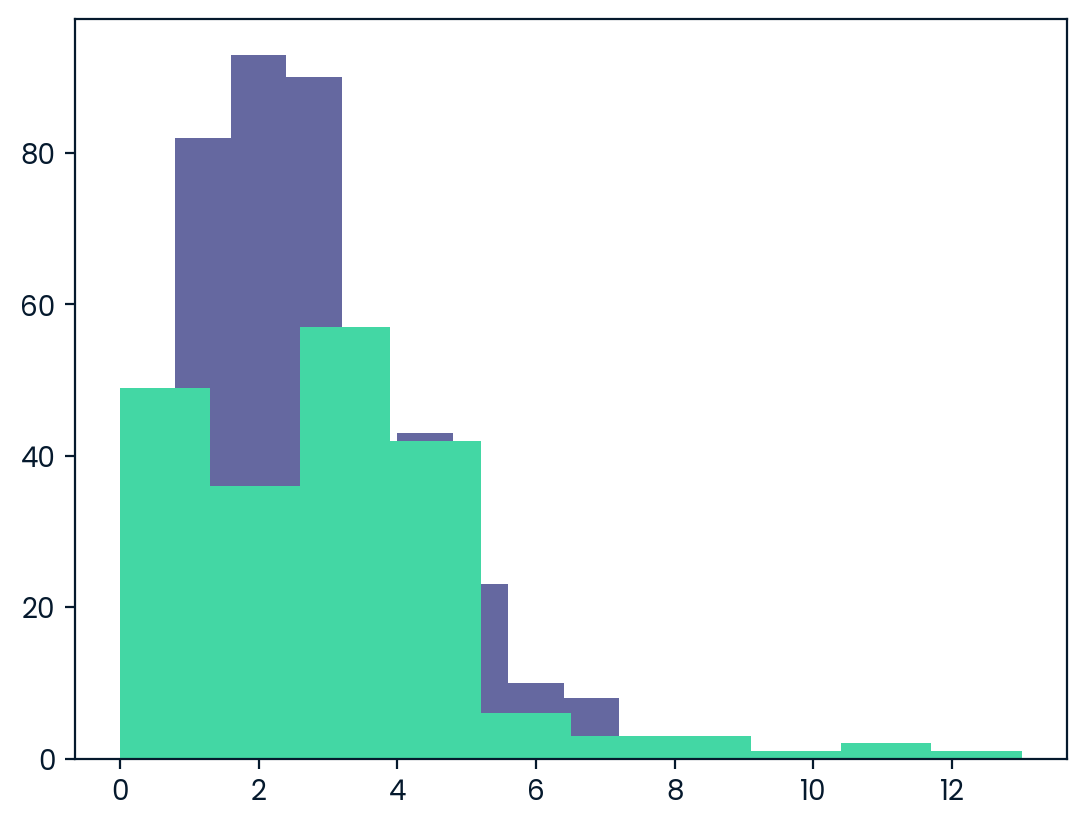

<Figure size 640x480 with 0 Axes>

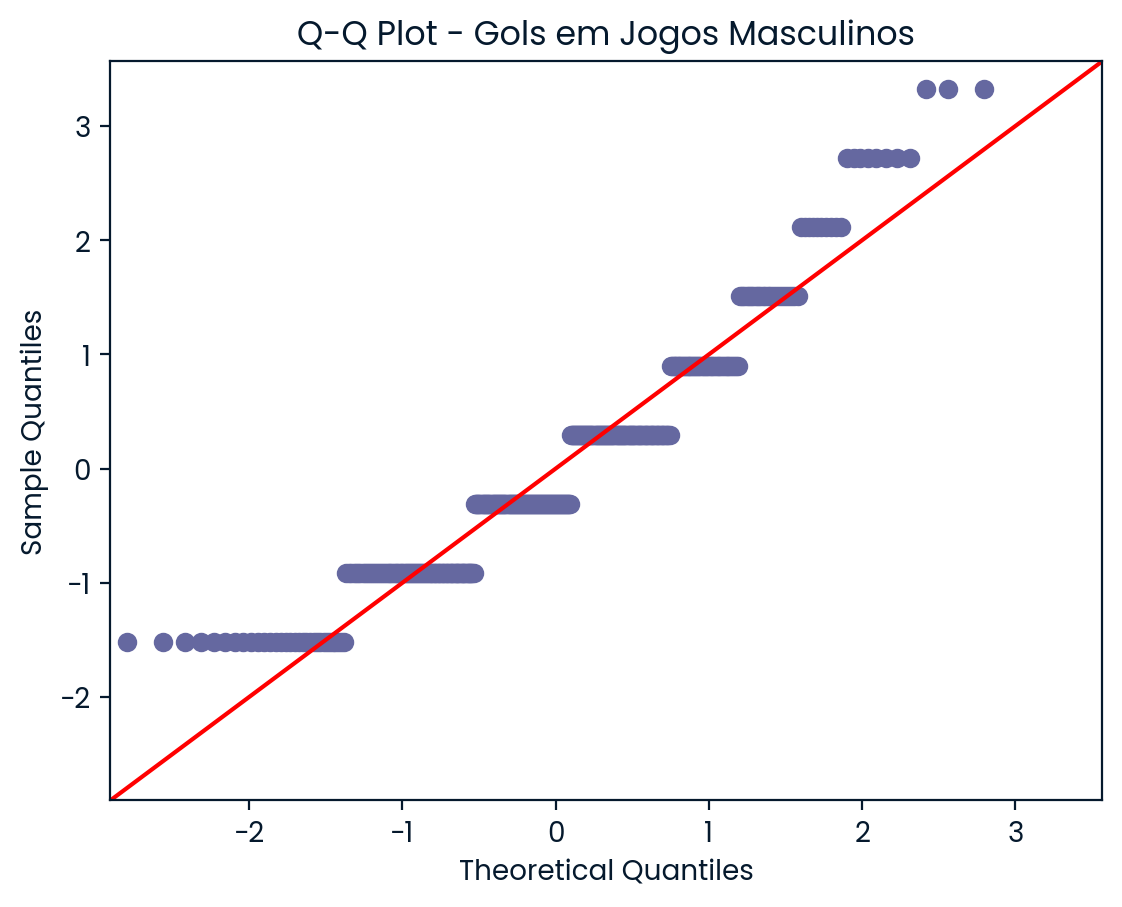

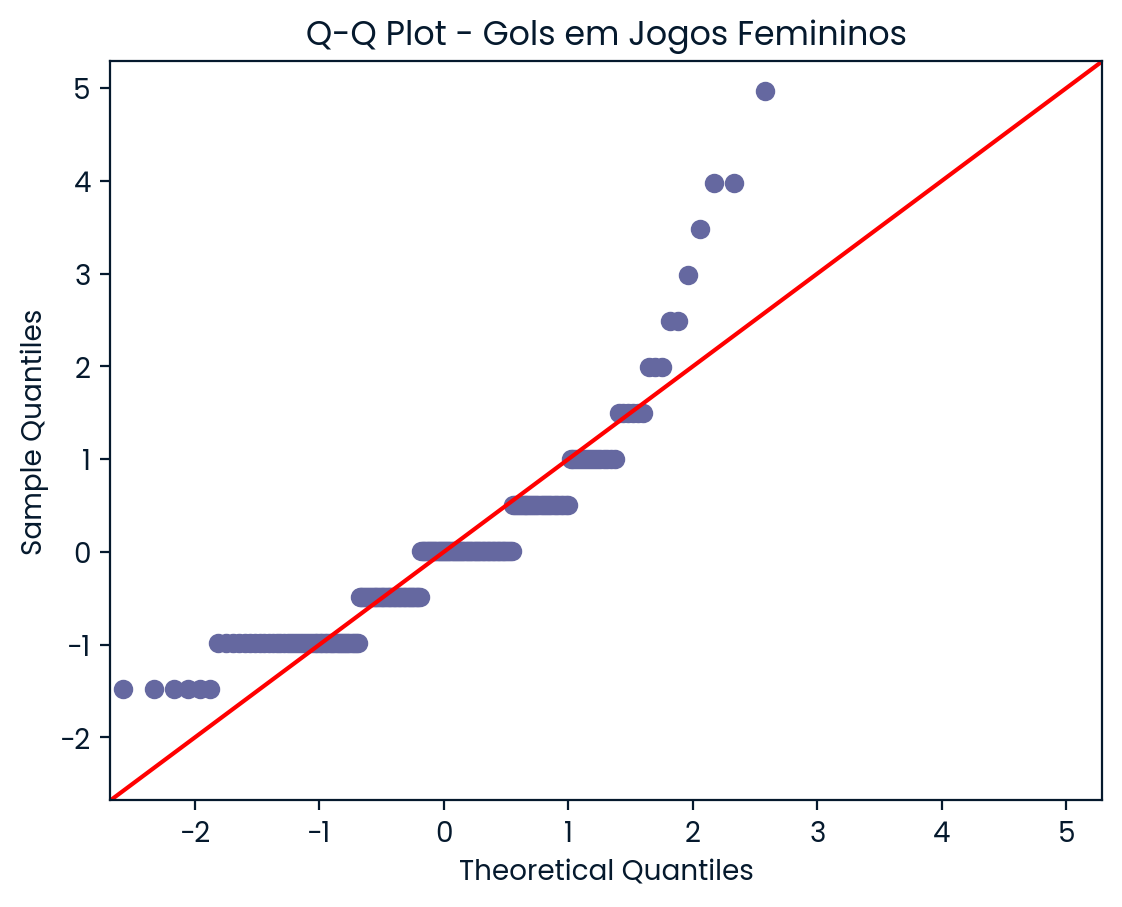

In [64]:
plt.hist(
    df[df['is_men']==True]['goals'] ,
)
plt.hist(
    df[df['is_men']==False]['goals'],
)
plt.show()
plt.clf()
qqplot(data=df[df['is_men']==True]['goals'], fit=True, line='45')
plt.title("Q-Q Plot - Gols em Jogos Masculinos")
plt.show()

qqplot(data=df[df['is_men']==False]['goals'], fit=True, line='45')
plt.title("Q-Q Plot - Gols em Jogos Femininos")
plt.show()

# Non-normal plots

In [65]:
from scipy.stats import mannwhitneyu
import pingouin

alpha = 0.1

# H0 -> Mean number of goals of womans == Mean number of goals of mens 
# H1 -> Mean number of goals of womans > Mean number of goals of mens

pivot_table = df.pivot_table(
    columns='is_men',
    values='goals',
    aggfunc='mean'
)

print(pivot_table)

statistic, pvalue_mann = mannwhitneyu(\
    y=df[df['is_men'] == True]['goals'],
    x=df[df['is_men'] == False]['goals'],
    alternative='greater'
)

stats = pingouin.mwu(
    y=df[df['is_men'] == True]['goals'],
    x=df[df['is_men'] == False]['goals'],
    alternative='greater'
)
pvalue_mwu = stats['p-val'].iloc[0]
print(pvalue_mann)
print(pvalue_mwu)

if pvalue_mann < alpha:
    print('Reject H0')
    result_dict = {'p_val': pvalue_mann, 'result': 'reject'}  
else:
    result_dict = {'p_val': pvalue_mann, 'result': 'fail to reject'}  
    print('Fail to reject H0')

is_men  False     True 
goals    2.98  2.513021
0.005106609825443641
0.005106609825443641
Reject H0
